In [3]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:

# Carregando o conjunto de dados
data = load_breast_cancer()
X, y = data['data'], data['target']
feature_names = data['feature_names']
target_names = data['target_names']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Treinando o modelo RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Precisão:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('Acurácia treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia teste:', accuracy_score(y_test, y_pred_test))


Precisão: 0.958904109589041
Recall: 0.9859154929577465
Acurácia treino: 1.0
Acurácia teste: 0.9649122807017544


In [6]:
# Cálculo das probabilidades para as curvas ROC
prob_train = model.predict_proba(X_train)
prob_test = model.predict_proba(X_test)

auc_train = roc_auc_score(y_train, prob_train[:, 1])
auc_test = roc_auc_score(y_test, prob_test[:, 1])
print('AUC treino:', auc_train)
print('AUC teste:', auc_test)


AUC treino: 1.0
AUC teste: 0.9952505732066819


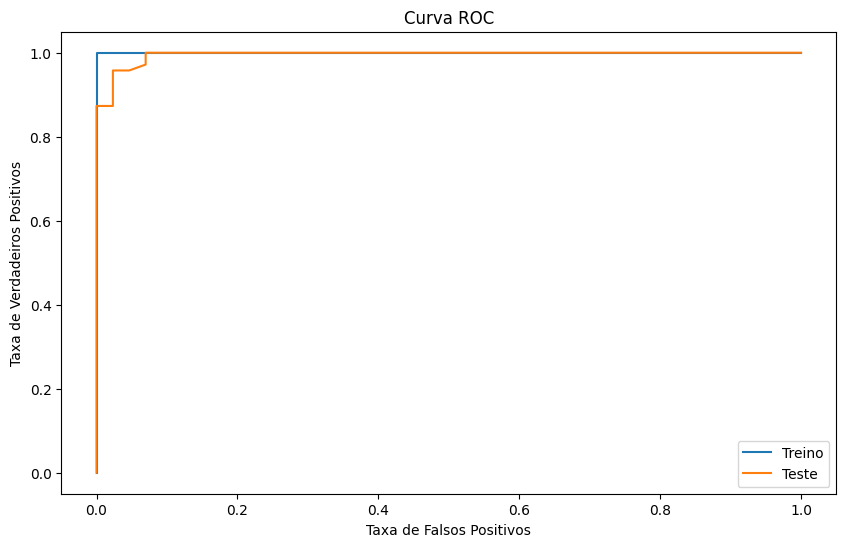

In [7]:
# Plotagem da curva ROC
fpr_train, tpr_train, _ = roc_curve(y_train, prob_train[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, prob_test[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Treino')
plt.plot(fpr_test, tpr_test, label='Teste')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


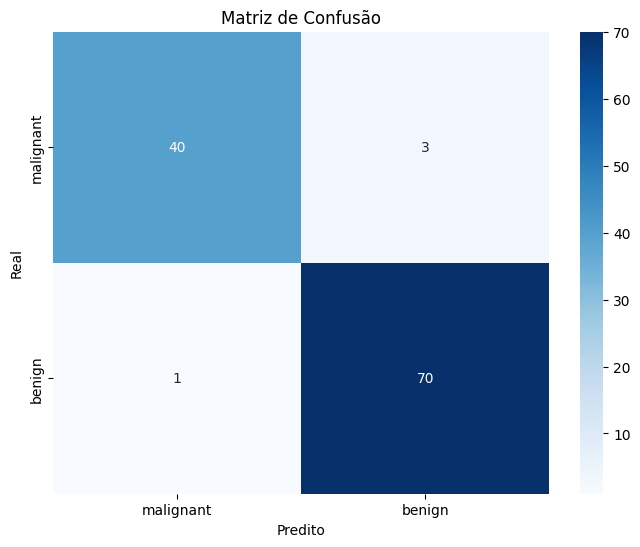

In [8]:






# Plotagem da matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Plotagem da importância das características

